<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [2]:
# Setup random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [3]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.07, random_state=RANDOM_SEED)
X[:10], y[:10]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483],
        [ 0.59906425, -0.28977331],
        [ 0.29009023, -0.2046885 ],
        [-0.03826868,  0.45942924],
        [ 1.61377123, -0.2939697 ],
        [ 0.693337  ,  0.82781911]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
# Turn data into a DataFrame
import pandas as pd

df = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "y":y})
df.head()

,X0,X1,y
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


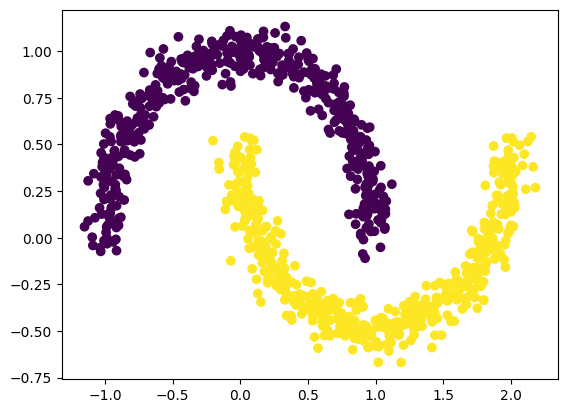

In [5]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(df["X0"], df["X1"], c=df["y"])
plt.show()

In [6]:
# Turn data into tensors of dtype float
X_tensor = torch.tensor(X, dtype=torch.float).to(device)
y_tensor = torch.tensor(y, dtype=torch.float).to(device)

In [7]:
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=RANDOM_SEED)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [8]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self):
        super(MoonModelV0, self).__init__()
        # Создадим три полносвязных слоя
        self.layer_1 = nn.Linear(2, 100)
        self.layer_2 = nn.Linear(100, 50)
        self.layer_3 = nn.Linear(50, 1)

    def forward(self, x):
        # Применим функцию активации LeakyReLU
        x = torch.nn.functional.leaky_relu(self.layer_1(x))
        x = torch.nn.functional.leaky_relu(self.layer_2(x))
        # Применим сигмоиду для получения вероятностей
        x = torch.sigmoid(self.layer_3(x))
        return x

# Instantiate the model
model = MoonModelV0().to(device)

In [9]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
  

In [10]:
from torchsummary import summary

summary(model, input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]             300
            Linear-2                   [-1, 50]           5,050
            Linear-3                    [-1, 1]              51
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [11]:
# Setup loss function
loss_function = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.Adam(model.parameters())

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [12]:
# Логиты (сырые выходные данные модели)
print("Logits:")
print(model(X_train[:10]).squeeze())

# Вероятности предсказаний
print("Pred probs:")
print(torch.sigmoid(model(X_train[:10]).squeeze()))

# Метки предсказаний
print("Pred labels:")
print(torch.round(torch.sigmoid(model(X_train[:10]).squeeze())))

Logits:
tensor([0.5026, 0.5171, 0.5051, 0.5043, 0.4975, 0.5055, 0.4964, 0.4977, 0.4983,
        0.5165], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.6231, 0.6265, 0.6237, 0.6235, 0.6219, 0.6238, 0.6216, 0.6219, 0.6221,
        0.6263], grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


In [13]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics

from torchmetrics import Accuracy

In [14]:
## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [15]:
torch.manual_seed(RANDOM_SEED)

epochs = 10000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    logits = model(X_train).squeeze()

    pred_probs = torch.sigmoid(logits)

    pred_labels = (pred_probs > 0.5).float()

    loss = loss_function(logits, y_train)

    acc = acc_fn(pred_labels, y_train.int())

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        with torch.inference_mode():
            test_logits = model(X_test).squeeze()

            test_pred_labels = (torch.sigmoid(test_logits) > 0.5).float()

            test_loss = loss_function(test_logits, y_test)
            test_acc = acc_fn(test_pred_labels, y_test.int())

            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.3f}, "
                  f"Accuracy: {acc.item():.3f}, Test Loss: {test_loss.item():.3f}, "
                  f"Test Accuracy: {test_acc.item():.3f}")

Epoch 10/10000, Loss: 0.702, Accuracy: 0.500, Test Loss: 0.702, Test Accuracy: 0.500
Epoch 20/10000, Loss: 0.675, Accuracy: 0.500, Test Loss: 0.677, Test Accuracy: 0.500
Epoch 30/10000, Loss: 0.645, Accuracy: 0.500, Test Loss: 0.649, Test Accuracy: 0.500
Epoch 40/10000, Loss: 0.617, Accuracy: 0.500, Test Loss: 0.622, Test Accuracy: 0.500
Epoch 50/10000, Loss: 0.594, Accuracy: 0.500, Test Loss: 0.599, Test Accuracy: 0.500
Epoch 60/10000, Loss: 0.578, Accuracy: 0.500, Test Loss: 0.582, Test Accuracy: 0.500
Epoch 70/10000, Loss: 0.568, Accuracy: 0.500, Test Loss: 0.570, Test Accuracy: 0.500
Epoch 80/10000, Loss: 0.560, Accuracy: 0.500, Test Loss: 0.562, Test Accuracy: 0.500
Epoch 90/10000, Loss: 0.554, Accuracy: 0.500, Test Loss: 0.555, Test Accuracy: 0.500
Epoch 100/10000, Loss: 0.549, Accuracy: 0.500, Test Loss: 0.549, Test Accuracy: 0.500
Epoch 110/10000, Loss: 0.544, Accuracy: 0.500, Test Loss: 0.543, Test Accuracy: 0.500
Epoch 120/10000, Loss: 0.539, Accuracy: 0.500, Test Loss: 0.537

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [16]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to(device)
    X, y = X.to(device), y.to(device)

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

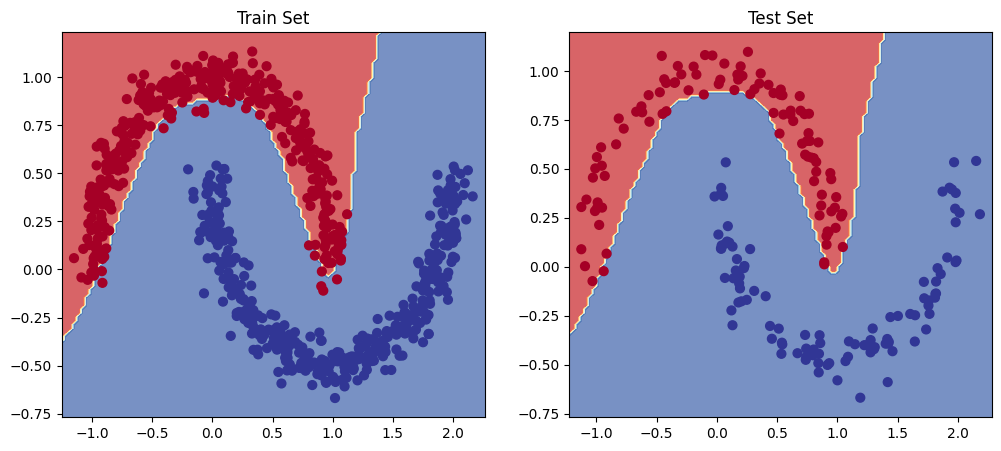

In [17]:
# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model, X_train, y_train)
plt.title("Train Set")

plt.subplot(1, 2, 2)
plot_decision_boundary(model, X_test, y_test)
plt.title("Test Set")

plt.show()

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

Тангенс $tanh(x/2)$:  
$$ g(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$  


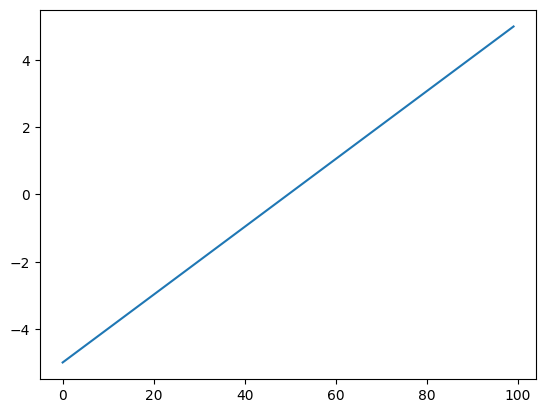

In [18]:
# Create a straight line tensor
x = torch.linspace(-5, 5, 100)
plt.plot(x)

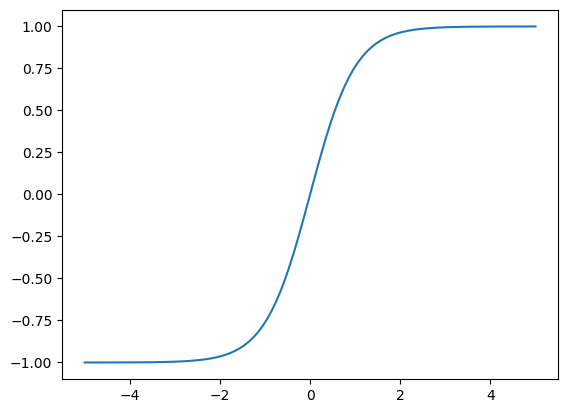

In [19]:
# Test torch.tanh() on the tensor and plot it
y_torch = torch.tanh(x)
plt.plot(x.numpy(), y_torch.numpy(), label="torch.tanh()")

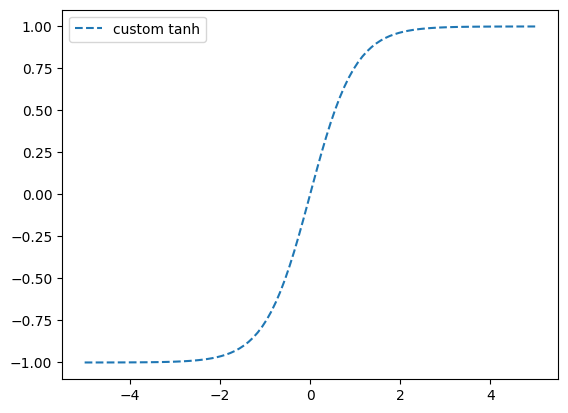

In [20]:
# Replicate torch.tanh() and plot it
y_custom = (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))
plt.plot(x.numpy(), y_custom.numpy(), label="custom tanh", linestyle="dashed")

plt.legend()
plt.show()

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

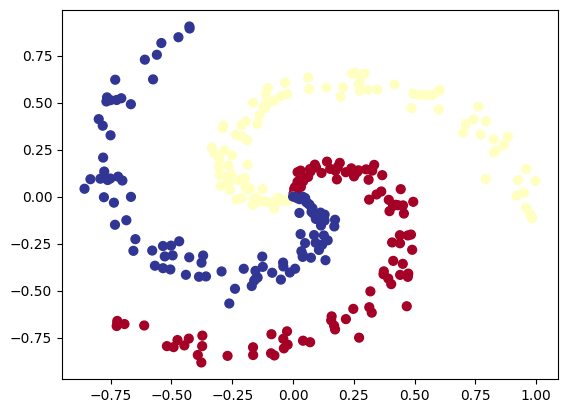

In [21]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype="uint8") # class labels

for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [22]:
# Turn data into tensors
import torch

In [23]:
# Create train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [24]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=3).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [25]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup data to be device agnostic
X_train = torch.from_numpy(X_train).float().to(device)
y_train = torch.from_numpy(y_train).long().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
y_test = torch.from_numpy(y_test).long().to(device)

print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

torch.float32 torch.float32 torch.int64 torch.int64


In [26]:
# Create model by subclassing nn.Module
class SpiralModel(nn.Module):
    def __init__(self):
        super(SpiralModel, self).__init__()
        self.layer1 = nn.Linear(2, 50)
        self.layer2 = nn.Linear(50, 3)  # 3 класса

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x


# Instantiate model and send it to device
model = SpiralModel().to(device)

In [27]:
# Logits (raw model outputs)
print("Logits:")
print(model(X_train[:10]))

# Prediction probabilities
print("Pred probs:")
print(torch.softmax(model(X_train[:10]), dim=1))

# Prediction labels
print("Pred labels:")
print(torch.argmax(model(X_train[:10]), dim=1))

Logits:
tensor([[ 0.2525, -0.1030, -0.1515],
        [ 0.2651, -0.1086, -0.2327],
        [ 0.2060, -0.1141, -0.1567],
        [ 0.2576, -0.2173, -0.3902],
        [ 0.2036, -0.1896, -0.3451],
        [ 0.2154, -0.1191, -0.2273],
        [ 0.2066, -0.1183, -0.2014],
        [ 0.2168, -0.0892, -0.0053],
        [ 0.2581, -0.1213, -0.2718],
        [ 0.2574, -0.2202, -0.3949]], grad_fn=<AddmmBackward0>)
Pred probs:
tensor([[0.4222, 0.2959, 0.2819],
        [0.4355, 0.2997, 0.2647],
        [0.4129, 0.2998, 0.2873],
        [0.4662, 0.2899, 0.2439],
        [0.4439, 0.2996, 0.2565],
        [0.4241, 0.3035, 0.2724],
        [0.4188, 0.3027, 0.2785],
        [0.3941, 0.2902, 0.3156],
        [0.4400, 0.3010, 0.2590],
        [0.4670, 0.2897, 0.2432]], grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [28]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [29]:
# Build a training loop for the model
epochs = 1000

# Loop over data
for epoch in range(epochs):
    # Forward pass
    logits = model(X_train)

    # Calculate loss
    loss = loss_fn(logits, y_train)
    acc = acc_fn(logits, y_train)

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # loss and acc
    with torch.no_grad():
      # Forward pass
        y_pred = model(X_test)
        test_loss = loss_fn(y_pred, y_test)
        _, predicted = torch.max(y_pred, 1)
        test_acc = acc_fn(predicted, y_test)

    # Print out what's happening every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.3f}, "
              f"Accuracy: {acc:.3f}, Test Loss: {test_loss.item():.3f}, "
              f"Test Accuracy: {test_acc:.3f}")

Epoch 100/1000, Loss: 0.294, Accuracy: 0.887, Test Loss: 0.268, Test Accuracy: 0.917
Epoch 200/1000, Loss: 0.124, Accuracy: 0.962, Test Loss: 0.100, Test Accuracy: 1.000
Epoch 300/1000, Loss: 0.080, Accuracy: 0.988, Test Loss: 0.051, Test Accuracy: 1.000
Epoch 400/1000, Loss: 0.061, Accuracy: 0.992, Test Loss: 0.031, Test Accuracy: 1.000
Epoch 500/1000, Loss: 0.050, Accuracy: 0.992, Test Loss: 0.021, Test Accuracy: 1.000
Epoch 600/1000, Loss: 0.043, Accuracy: 0.992, Test Loss: 0.015, Test Accuracy: 1.000
Epoch 700/1000, Loss: 0.039, Accuracy: 0.992, Test Loss: 0.011, Test Accuracy: 1.000
Epoch 800/1000, Loss: 0.035, Accuracy: 0.992, Test Loss: 0.008, Test Accuracy: 1.000
Epoch 900/1000, Loss: 0.032, Accuracy: 0.992, Test Loss: 0.006, Test Accuracy: 1.000
Epoch 1000/1000, Loss: 0.030, Accuracy: 0.992, Test Loss: 0.005, Test Accuracy: 1.000


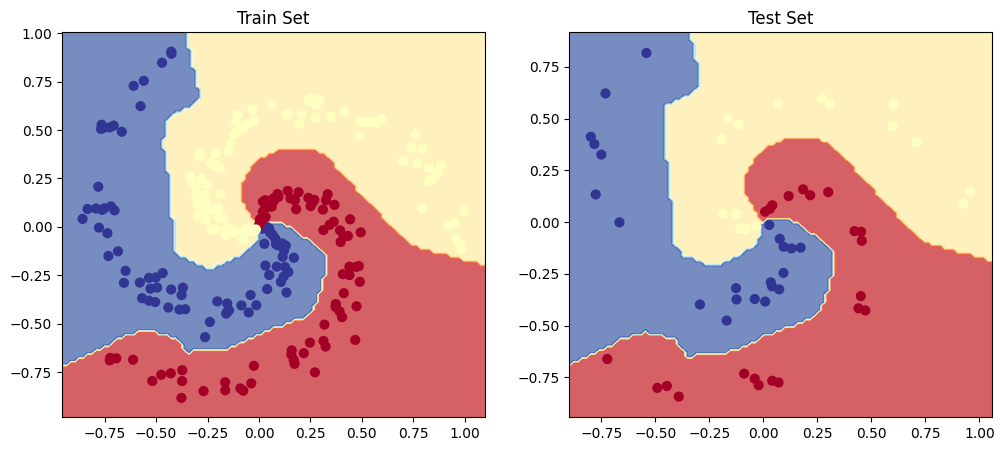

In [30]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model, X_train, y_train)
plt.title("Train Set")

plt.subplot(1, 2, 2)
plot_decision_boundary(model, X_test, y_test)
plt.title("Test Set")

plt.show()